In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
branded_food = pd.read_csv("/content/drive/MyDrive/FoodData_Central_Clean/branded_food.csv")
branded_food.shape

<ipython-input-4-26732e216305>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  branded_food = pd.read_csv("/content/drive/MyDrive/FoodData_Central_Clean/branded_food.csv")


(1958978, 12)

In [5]:
branded_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958978 entries, 0 to 1958977
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fdc_id                 int64  
 1   brand_owner            object 
 2   brand_name             object 
 3   gtin_upc               object 
 4   ingredients            object 
 5   serving_size           float64
 6   serving_size_unit      object 
 7   branded_food_category  object 
 8   data_source            object 
 9   modified_date          object 
 10  available_date         object 
 11  market_country         object 
dtypes: float64(1), int64(1), object(10)
memory usage: 179.3+ MB


In [6]:
branded_food.head()

,fdc_id,brand_owner,brand_name,gtin_upc,ingredients,serving_size,serving_size_unit,branded_food_category,data_source,modified_date,available_date,market_country
0,1105904,Richardson Oilseed Products (US) Limited,Unknown,27000612323,Vegetable Oil,15.0,ml,Oils Edible,GDSN,2020-10-02,2020-11-13,United States
1,1105905,CAMPBELL SOUP COMPANY,Unknown,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",240.0,ml,Herbs/Spices/Extracts,GDSN,2020-09-12,2020-11-13,United States
2,1105906,CAMPBELL SOUP COMPANY,Unknown,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",440.0,g,Prepared Soups,GDSN,2020-09-01,2020-11-13,United States
3,1105907,CAMPBELL SOUP COMPANY,Unknown,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",440.0,g,Prepared Soups,GDSN,2020-09-01,2020-11-13,United States
4,1105908,CAMPBELL SOUP COMPANY,Unknown,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",240.0,ml,Herbs/Spices/Extracts,GDSN,2020-10-03,2020-11-13,United States


In [7]:
category_counts = branded_food["branded_food_category"].value_counts()
category_percentage = (category_counts/category_counts.sum())*100
categories_to_keep = category_percentage[category_percentage>=1].index
filtered_branded_food = branded_food[branded_food['branded_food_category'].isin(categories_to_keep)]

In [8]:
new_db = filtered_branded_food[['brand_owner', 'brand_name', 'ingredients', 'branded_food_category']]

In [9]:
label_encoder = LabelEncoder()
new_db['brand_owner_encoded'] = label_encoder.fit_transform(new_db['brand_owner'])
new_db['brand_name_encoded'] = label_encoder.fit_transform(new_db['brand_name'])

<ipython-input-9-8e49869fde5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_db['brand_owner_encoded'] = label_encoder.fit_transform(new_db['brand_owner'])
<ipython-input-9-8e49869fde5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_db['brand_name_encoded'] = label_encoder.fit_transform(new_db['brand_name'])


In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limit features to avoid high dimensionality
tfidf_features = tfidf_vectorizer.fit_transform(new_db['ingredients']).toarray()

In [11]:
for i in range(tfidf_features.shape[1]):
    new_db[f'tfidf_feature_{i}'] = tfidf_features[:, i]

<ipython-input-11-ca312fd0bef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_db[f'tfidf_feature_{i}'] = tfidf_features[:, i]
<ipython-input-11-ca312fd0bef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_db[f'tfidf_feature_{i}'] = tfidf_features[:, i]
<ipython-input-11-ca312fd0bef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [12]:
new_db['branded_food_category_encoded'] = label_encoder.fit_transform(new_db['branded_food_category'])

<ipython-input-12-ff286537f160>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_db['branded_food_category_encoded'] = label_encoder.fit_transform(new_db['branded_food_category'])


In [13]:
correlation_columns = ['brand_owner_encoded', 'brand_name_encoded', 'branded_food_category_encoded'] + \
                      [f'tfidf_feature_{i}' for i in range(tfidf_features.shape[1])]
correlation_matrix = new_db[correlation_columns].corr()

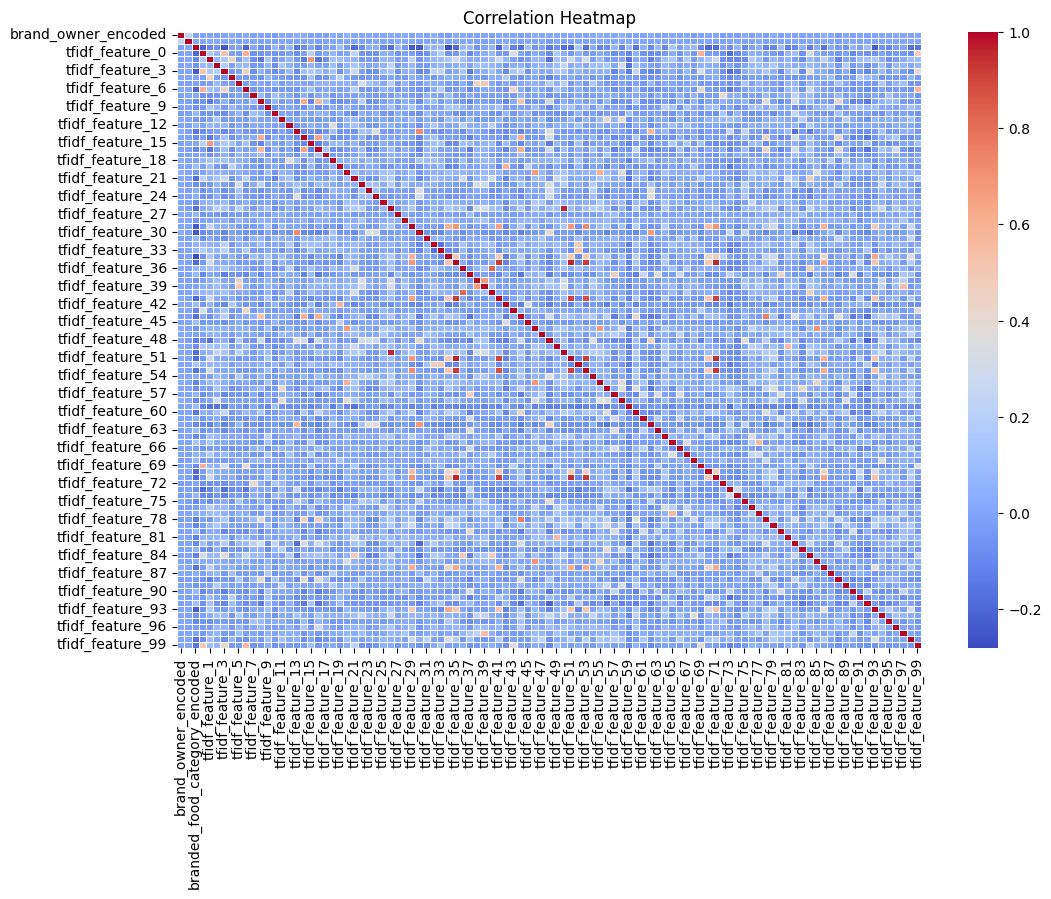

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
strong_threshold = 0.1

target_col = "branded_food_category_encoded"
strong_corr = correlation_matrix.loc[
    (correlation_matrix[target_col] > strong_threshold) |
    (correlation_matrix[target_col] < -strong_threshold), target_col
]

strong_corr = strong_corr[strong_corr.index != target_col]

In [17]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

feature_mapping = {
    f"tfidf_feature_{i}": tfidf_feature_names[i]
    for i in range(len(tfidf_feature_names))
}

strong_corr_features = strong_corr.index.map(
    lambda x: feature_mapping[x] if x in feature_mapping else x
)

strong_corr_df = pd.DataFrame({
    "Feature": strong_corr_features,
    "Correlation": strong_corr.values
}).sort_values(by="Correlation", ascending=False)

print("Strongly Correlated Features with Target:")
print(strong_corr_df)


Strongly Correlated Features with Target:
         Feature  Correlation
17       natural     0.152671
21     potassium     0.148633
13         lemon     0.108279
29         water     0.101809
25       soybean    -0.102328
19            of    -0.107204
11          lake    -0.112589
27         syrup    -0.120204
26        starch    -0.120793
24           soy    -0.123847
14          milk    -0.134972
3         cheese    -0.154186
20          palm    -0.154764
28      thiamine    -0.155224
32        yellow    -0.158447
31         yeast    -0.161088
12      lecithin    -0.167518
18        niacin    -0.168121
5   diglycerides    -0.170252
15          mono    -0.177889
4           corn    -0.178919
23    riboflavin    -0.180005
16   mononitrate    -0.189891
10          iron    -0.190380
22       reduced    -0.191398
0             40    -0.194981
9          folic    -0.195333
2           blue    -0.198751
30         wheat    -0.226534
6       enriched    -0.235750
7        enzymes    -0.23772

<ipython-input-18-4855ceb9bdb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


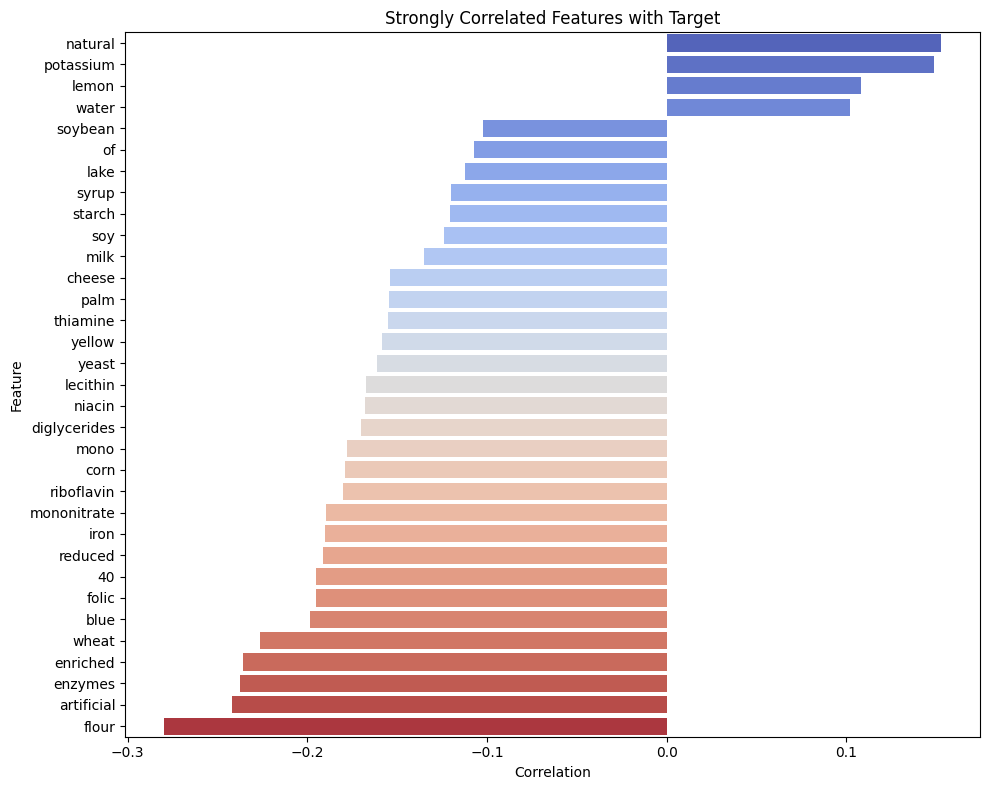

In [18]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=strong_corr_df,
    y="Feature",
    x="Correlation",
    palette="coolwarm",
    orient="h"
)
plt.title("Strongly Correlated Features with Target")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
